In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import collections
import random

### Funkcje pomocnicze z poprzedniego zestawu

In [2]:
def calculate_nodes_position(n_of_nodes):
    """
    Function calculates position of the nodes.
    :param n_of_nodes: an integer which represents number of nodes
    :return nodes: a dictionary which contains a number of node as a key a tuple with coordinates as a value.
    """
    
    nodes = {}
    for n in range(0, n_of_nodes):
        x = math.cos(2 * math.pi / n_of_nodes * n)
        y = math.sin(2 * math.pi / n_of_nodes * n)
        nodes.update({n: (x, y)})
    return nodes

In [3]:
def create_graph_visualization(matrix):
    """
    Function visualizes the matrix of neighbourhood of graph
    :param matrix: it's a numpy matrix, so using our functions from previous module
                    it is needed to be converted by numpy.matrix
    :return: None
    """
    sizes = matrix.shape
    if len(sizes) != 2 or sizes[0] != sizes[1]:
        print("Incorrect matrix!")
        return
    if len(matrix) > 0:
        nodes = calculate_nodes_position(len(matrix))
        plt.figure(figsize=(5, 5))
        graph_visualization = nx.from_numpy_matrix(matrix)
        nx.draw_networkx(graph_visualization, nodes, node_color="#FFE55E", font_size=15)
        plt.show()
    else:
        print("Empty matrix!")

In [4]:
def from_matrix_neighbour_to_list(matrix):
    """
    Function converts neighbourhood matrix to neighbourhood list
    :param matrix: not empty array of arrays which represents graph
    :return: it's a dictionary: keys are numbers of graph vertex and values
                    are lists of other vertexes connected with them by edge
    """
    
    list = {}

    i = 0
    for row in matrix:
        i += 1
        row_list = []
        lenght = len(row)
        for j in range(lenght):
            if row[j] == 1:
                row_list.append(j + 1)
        list[i] = row_list
    return list

In [5]:
def from_list_to_matrix_neighbour(list):
    """
    Function converts neighbourhood list to neighbourhood matrix
    :param list: it's a dictionary: keys are numbers of graph vertex and values
                    are lists of other vertexes connected with them by edge
    :return:  array of arrays which represents graph
    """
    matrix = []
    length = len(list)
    for elements in list.values():
        row = []
        for i in range(1, length + 1):
            if i in elements:
                row.append(1)
            else :
                row.append(0)
        matrix.append(row)
    return matrix

### Proste sortowanie.  Na wejściu przyjmuje ciąg graficzny. Zwraca posortowany ciąg graficzny

In [6]:
def bubble_sort(arr):
    """
        Function uses bubble sort algorithm to sort a list.
        :param arr: it's a not empty list 
        :return arr: sorted list.
    """
    
    temp = 0
    for i in range(0, len(arr)-1):
        for j in range(0, len(arr)-i-1):
            if arr[j] < arr[j+1]:
                temp = arr[j]
                arr[j] = arr[j+1]
                arr[j+1] = temp
    return arr

### Zliczanie nieparzystych elementów. Funkcja sprawdza czy w sekwencji jest nieparzysta liczba elementów nieparzystych. Na wejściu przyjmuje ciąg graficzny. Zwraca true jeżeli przekazany ciąg jest ciągiem graficznym, w przeciwnym wypadku false.

In [7]:
def calculate_odd_elements(arr):
    """
        Function calcuates the number of odd element in a list.
        :param arr: it's a not empty list 
        :return isDegreeSeq: boolean value - False when there is odd number of odd elements, True when there is even number of odd elements.
    """
    
    counter = 0;
    isDegreeSeq = True;
    for i in range(0, len(arr)):
        if arr[i] % 2 == 1:
            counter = counter + 1
    if counter % 2 == 1:
        isDegreeSeq = False
    return isDegreeSeq

# Zad1
### Algorytm sprawdzający czy sekwencja liczb jest ciągiem graficznym. Na wejściu przyjmuje ciąg graficzny. Zwraca true jeżeli przekazany ciąg jest ciągiem graficznym, w przeciwnym wypadku false

In [8]:
def degree_seq(arr):
    """
        Function check if the list represents a degree sequence or not.
        :param arr: it's a non empty list 
        :return boolean: boolean value - True if the list represents a degree sequence, otherwise False.
    """
    
    if calculate_odd_elements(arr):
        arr = bubble_sort(arr)
        while True:
            allZeros = all(elem == 0 for elem in arr)
            if allZeros == True:
                return allZeros
            isNegative = False
            for i in range(1, len(arr)):
                if arr[i] < 0:
                    isNegative = True
            if arr[0] < 0 or arr[0] >= len(arr) or isNegative:
                return False
            for i in range(1, arr[0]+1):
                arr[i] = arr[i] - 1
            arr[0] = 0
            arr = bubble_sort(arr)
    else:
        return False

### Test

In [9]:
print(degree_seq([4,4,3,1,2]))
print(degree_seq([4,2,2,3,2,1,4,2,2,2,2]))

False
True


### Wyznaczenie sumy tablicy jednowymiarowej macierzy. Funkcja jest używana to obliczania stopni wierzchołków dla macierzy sąsiedztwa. Przyjmuje rząd z macierzy sąsiedztwa. Zwraca sumę która jest stopniem wierzchołka.

In [10]:
def sum(arr):
    
    """
        Function calculates a sum of the list elements.
        :param arr: it's not empty list
        :return sum: integer which represents a sum of list elements.
    """
    
    sum = 0
    for i in range(0, len(arr)):
        sum = sum + arr[i]
    return sum

### Sprawdzenie czy wierzchołki w macierzy sąsiedztwa mają stopnie zgodne z wymaganymi. Przyjmuje macierz sąsiedztwa oraz ciąg graficzny. Zwraca tablicę zawierającą indeksy wierzchołków o błędnych stopniach

In [11]:
def check_matrix_correctness(matrix, degrees):
    
    """
        Function check if the number of edges from each vertex is equal to a number represents degree of each vertex.
        :param matrix: not empty array of arrays which represents graph
        :param degrees: not empty array which represents vertices degrees of the graph
        :return errorsArr: an array which contains an indexes of incorrect vertices.
    """
    
    errorsArr = []
    tmp = 0
    for i in range(len(matrix)):
        tmp = sum(matrix[i])
        if tmp != degrees[i]:
            errorsArr.append(i)
    return errorsArr

In [12]:
def sort_in_reverse_order(list):
    
    """
        Function sorts an array of arrays in reverse order.
        :param list: an unsorted array of arrays
        :return : None. 
    """
    
    for i in range(len(list)-1):
        for j in range(i+1, len(list)):
            if list[i][1] < list[j][1]:
                tmp = list[i]
                list[i] = list[j]
                list[j] = tmp

### Funckja tworzy graf zbudowany na podstawie zadanego ciągu graficznego. Przyjmuje ciąg graficzny. Zwraca utworzony graf lub pustą tablice jeżeli grafu nie da się utworzyć na podstawie zadanego ciągu 

In [13]:
def create_graph_from_seq(arr):
    
    """
        Function creates a graph based on the degree sequence represented by an array arr.
        :param arr: an array which represents a degree sequence
        :param matrix or []: an array of arrays which represents a graph.
        :raise Exception: in case an input array is not a degree sequence
    """
    
    arr = bubble_sort(arr)
    matrix = [[0 for i in range(len(arr))] for j in range(len(arr))]
    listOfIndexesAndDegrees = []
    for i in range(len(arr)):
        listOfIndexesAndDegrees.append([i, arr[i]])
           
    if degree_seq(arr):
        while True:
            allZeros = True
            for i in range(len(arr)):
                if listOfIndexesAndDegrees[i][1] != 0:
                    allZeros = False
            if allZeros and check_matrix_correctness(matrix, arr):
                return matrix
            isNegative = False
            for i in range(1, len(arr)):
                if listOfIndexesAndDegrees[i][1] < 0:
                    isNegative = True
            if listOfIndexesAndDegrees[0][1] < 0 or listOfIndexesAndDegrees[0][1] >= len(arr) or isNegative:
                return []
            for i in range(1, listOfIndexesAndDegrees[0][1] + 1):
                matrix[listOfIndexesAndDegrees[0][0]][listOfIndexesAndDegrees[i][0]] = 1
                matrix[listOfIndexesAndDegrees[i][0]][listOfIndexesAndDegrees[0][0]] = 1
                listOfIndexesAndDegrees[i][1] = listOfIndexesAndDegrees[i][1] - 1
            listOfIndexesAndDegrees[0][1] = 0
            sort_in_reverse_order(listOfIndexesAndDegrees)
    else:
        raise Exception("It's not a degree sequence!")

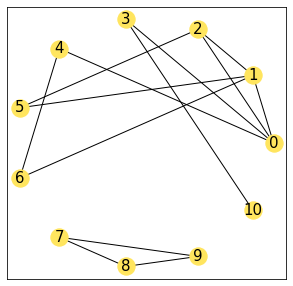

In [14]:
try:
    matrix = create_graph_from_seq([4, 2, 2, 3, 2, 1, 4, 2, 2, 2, 2])
    create_graph_visualization(np.matrix(matrix))
except Exception as e:
    print(e)

In [15]:
try:
    matrix = create_graph_from_seq([4, 4, 3, 1, 2])
    create_graph_visualization(np.matrix(matrix))
except Exception as e:
    print(e)

It's not a degree sequence!


## Zad5

### Funkcja tworząca graf k-regularny. Przyjmuje k - stopień pojedyńczego wierzchołka, numOfVertices - liczbę wierzchołków. Zwraca macierz lub pustą tablice jeśli nie można utworzyć macierzy.

In [16]:
def generate_k_regular_graph(k, numOfVertices):
    
    """
        Function creates a k regular graph.
        :param k: an integer which is a degree of each vertex
        :param numOfVertices: an integer which describes a number of vertices
        :return matrix: an array of arrays which represents a graph
        :raise Exception: in case an input array is not a degree sequence
    """
    
    arr = []
    for i in range(numOfVertices):
        arr.append(k)
    copy = arr.copy();
    if not degree_seq(copy):
        raise Exception("It's not a degree sequence!")
    else:
        return create_graph_from_seq(arr)

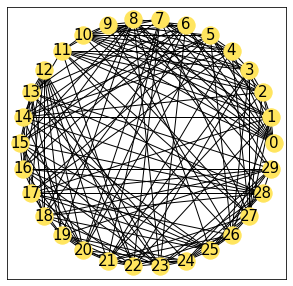

In [17]:
try:
    generate_k_regular_graph(11, 30)
    create_graph_visualization(np.matrix(generate_k_regular_graph(11, 30)))
except Exception as e:
    print(e)

In [18]:
try:
    generate_k_regular_graph(3, 7)
    create_graph_visualization(np.matrix(generate_k_regular_graph(3, 7)))
except Exception as e:
    print(e)

It's not a degree sequence!


## Zad2

### Funkcja randomizująca graf. Przyjmuje graph - graf zadany macierzą sąsiedztwa, number - ilość randomizacji. Funkcja nic nie zwraca

In [19]:
def check_all_zeros(graph, idx):
    
    """
        Function checks if the vertex degree is equal to 0.
        :param graph: an array of arrays which represents the graph
        :param idx: an integer which describes vertex index
        :return allZeros: boolean value which is true when the vertex degree is equal to 0. Otherwise returns false.
    """
    
    allZeros = True
    for i in range(len(graph)):
        if graph[idx][i] != 0:
            allZeros = False
    return allZeros

In [20]:
def randomize(graph, number):
    
    """
        Function randomize a graph by changing a vertices ab and cd to ad and bc.
        :param graph: an array of arrays which represents the graph
        :param number: an integer which represents a number of randomizations
        :return : None
    """
    
    # sprawdzenie czy przekazano graf
    if len(graph) > 0:
        size = len(graph)-1
        # pętla pozwalająca na wykonanie określonej liczby randomizacji
        for rands in range(number):
            mainIter = 0
            while True:
                iter = 0
                # losowanie wierzchołka A
                aIdx = random.randint(0, size)
                # zabezpieczenie przed wylosowaniem wierzchołka o stopniu 0
                while check_all_zeros(graph, aIdx):
                    aIdx = random.randint(0, size)
                # tablica na wierzchołki, z którymi wylosowany wierzchołek A jest połączony 
                tmpIndexes = []
                for idx in range(len(graph)):
                    if graph[aIdx][idx] == 1:
                        tmpIndexes.append(idx)
                # losowanie wierzchołka B, który jest połączony z wierzchołkiem A
                bIdx = random.choice(tmpIndexes)
                # tablica na potencjalne wierzchołki C, które nie są połączone z B
                tmpIndexes = []
                for idx in range(len(graph)):
                    if graph[bIdx][idx] == 0:
                        tmpIndexes.append(idx)
                # losowanie wierzchołka C, 50 prób ponieważ możliwe że wierzchołek B jest połączony ze wszystkimi pozostałymi wierzchołkami
                cIdx = random.choice(tmpIndexes)
                while cIdx == bIdx or check_all_zeros(graph, cIdx):
                    cIdx = random.choice(tmpIndexes)
                    iter = iter + 1
                    if iter == 50:
                        break
                if iter != 50:
                    iter = 0
                    # tablica na wierzchołki, które są połączone z wierzchołkiem c
                    tmpIndexes = []
                    for idx in range(len(graph)):
                        if graph[cIdx][idx] == 1:
                            tmpIndexes.append(idx)
                    # losowanie wierzchołka D
                    iter = 0
                    isGood = False
                    dIdx = random.choice(tmpIndexes)
                    # podjęcie 50 prób na znalezienie wierzchołka D, który pozwoli zrandomizować graf
                    while not isGood:
                        dIdx = random.choice(tmpIndexes)
                        if graph[cIdx][dIdx] == 1 and graph[dIdx][aIdx] == 0 and aIdx != dIdx:
                            isGood = True
                        else:
                            iter = iter + 1
                            if iter == 50:
                                break
                    if isGood and graph[aIdx][dIdx] == 0 and graph[bIdx][cIdx] == 0:
                        #print("A = " + str(aIdx) + " B = " + str(bIdx) + " C = " + str(cIdx) + " D = " + str(dIdx))
                        graph[aIdx][bIdx] = 0
                        graph[bIdx][aIdx] = 0
                        graph[aIdx][dIdx] = 1
                        graph[dIdx][aIdx] = 1
                        graph[cIdx][dIdx] = 0
                        graph[dIdx][cIdx] = 0
                        graph[bIdx][cIdx] = 1
                        graph[cIdx][bIdx] = 1
                        break
                mainIter = mainIter + 1
                if mainIter == 1000:
                    print("Couldn't randomize graph!")
                    return

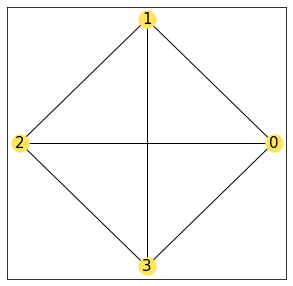

Couldn't randomize graph!


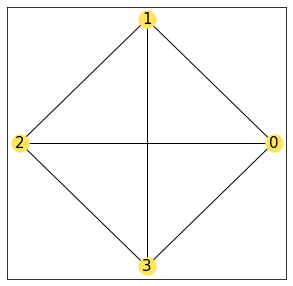

In [21]:
try:
    matrix = create_graph_from_seq([3, 3, 3, 3])
    create_graph_visualization(np.matrix(matrix))
    randomize(matrix, 5)
    create_graph_visualization(np.matrix(matrix))
except Exception as e:
    print(e)

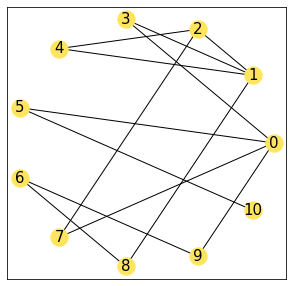

In [22]:
try:
    matrix = create_graph_from_seq([4, 2, 2, 3, 2, 1, 4, 2, 2, 2, 2])
    randomize(matrix, 50)
    create_graph_visualization(np.matrix(matrix))
except Exception as e:
    print(e)

In [23]:
try:
    matrix = generate_k_regular_graph(3, 5)
    randomize(matrix, 10)
    create_graph_visualization(np.matrix(matrix))
except Exception as e:
    print(e)

It's not a degree sequence!


## Zad3

### Funkcja przeszukująca graf w głąb. Przyjmuje numer iteracji, wierzchołek, macierz sąsiedztwa i stos reprezentowany przez tablicę. Funkcja nic nie zwraca.

In [24]:
def components_r(nr, v, graph, comp):
    
    """
        Function represents implementation of DFS algorithm.
        :param nr: an integer which represents a number of component
        :param v: an integer which represents a number of the vertex
        :param graph: a dictionary in which keys are numbers of graph vertex and values
                    are lists of other vertexes connected with them by edge 
        :param comp: an array which stores numbers, that numbers represents an index of each component
        :return : None.
    """
    
    for j in range(len(graph.get(v))):
        if comp[graph.get(v)[j]-1] == -1:
            comp[graph.get(v)[j]-1] = nr
            components_r(nr, graph.get(v)[j], graph, comp)

### Funkcja wyznaczająca spójne składowe. Przyjmuje graf w postaci macierzy sąsiedztwa. Funkcja nic nie zwraca.

In [25]:
def components(graph):
    
    """
        Function creates and prints a list of graph components.
        :param graph: a dictionary in which keys are numbers of graph vertex and values
                    are lists of other vertexes connected with them by edge
        :return : None.
    """
    
    nr = 0
    comp = [-1 for i in range(len(graph))]
    for i in range(len(graph)):
        if comp[i] == -1:
            nr = nr + 1
            comp[i] = nr
            components_r(nr, i+1, graph, comp)
    counter = 0
    dicto = {}
    for i in range(len(comp)):
        if comp[i] != counter:
            counter = comp[i]
            dicto[counter] = []
    for i in range(len(comp)):
        dicto[comp[i]].append(i+1)
    sorted_dict = collections.OrderedDict(sorted(dicto.items()))
    temp = ""
    for i in range(1, len(sorted_dict)+1):
        temp = temp + str(i) + ") "
        for elem in sorted_dict[i]:
            temp = temp + str(elem) + " "
        print(temp)
        temp = ""
    longest = -1
    longest_dict_idx = 0
    for i in range(1, len(sorted_dict)+1):
        if len(sorted_dict[i]) > longest:
            longest = len(sorted_dict[i])
            longest_dict_idx = i
    print("Najwieksza skladowa ma numer " + str(longest_dict_idx) + ".")

In [26]:
def getNumberOfComponents(graph):
    
    """
        Function creates a dictionary of graph components. It returns a length of the dictionary 
        which represents the number of components.
        :param graph: a dictionary in which keys are numbers of graph vertex and values
                    are lists of other vertexes connected with them by edge
        :return len(sorted_dict): an integer which represents a numbre of components.
    """
    
    nr = 0
    comp = [-1 for i in range(len(graph))]
    for i in range(len(graph)):
        if comp[i] == -1:
            nr = nr + 1
            comp[i] = nr
            components_r(nr, i+1, graph, comp)
    counter = 0
    dicto = {}
    for i in range(len(comp)):
        if comp[i] != counter:
            counter = comp[i]
            dicto[counter] = []
    for i in range(len(comp)):
        dicto[comp[i]].append(i+1)
    sorted_dict = collections.OrderedDict(sorted(dicto.items()))
    return len(sorted_dict)

In [27]:
try:
    print(getNumberOfComponents(from_matrix_neighbour_to_list(create_graph_from_seq([4,2,2,3,2,1,4,2,2,2,2]))))
except Exception as e:
    print(e)

2


### Test

In [28]:
try:
    components(from_matrix_neighbour_to_list(create_graph_from_seq([4,2,2,3,2,1,4,2,2,2,2])))
except Exception as e:
    print(e)

1) 1 2 3 4 5 6 7 11 
2) 8 9 10 
Najwieksza skladowa ma numer 1.


## Zad4

### Funkcje wyznaczająca cykl Eulera. Funkcja przyjmuje stos reprezentowany przez tablicę, który służy do przechowywania numerów wierzchołków, indeks reprezentujący wierzchołek, macierz będącą grafem.

In [29]:
def find_euler_cycle(cycle, idx, graph, isolatedVertices):
    
    """
        Function returns an array which represents Euler cycle.
        :param cycle: an array which stores an indexes of vertices
        :param idx: an integer which represents an index of vertex
        :param graph: an array of arrays which represents a graph
        :param isolatedVertices: an integer which represents a number of isolated components
        :return : None.
    """
    
    for j in range(len(graph[idx])):
        if graph[idx][j] != 0:
            graph[idx][j] = 0
            graph[j][idx] = 0
            if getNumberOfComponents(from_matrix_neighbour_to_list(graph)) - isolatedVertices > 1:
                if not 1 in graph[j] and not 1 in graph[idx]:
                    isolatedVertices = isolatedVertices + 1
                    cycle.append(j+1)
                    cycle.append(idx+1)
                    return
                elif not 1 in graph[j] and 1 in graph[idx]:
                    graph[idx][j] = 1
                    graph[j][idx] = 1
                else:
                    isolatedVertices = isolatedVertices + 1
                    find_euler_cycle(cycle, j, graph, isolatedVertices)
            else:
                find_euler_cycle(cycle, j, graph, isolatedVertices)
    cycle.append(idx+1)

### Funkcja zwracająca losowy ciąg graficzny o zadanej długości. Funkcja przyjmuję liczbę wyznaczającą ilość wierzchołków tworzonego grafu

In [30]:
def prepare_random_vertices(numberOfVertices):
    
    """
         Function creates a degree sequence which contains Euler cycle.
         :param numberOfVertices: an integer which represents a length of generated array
         :return vertices: an array which represents a degree sequence.
    """
    
    vertices = [-1 for i in range(numberOfVertices)]
    for i in range(numberOfVertices):
        randNum = random.randint(1, numberOfVertices)
        while (randNum % 2 != 0 or randNum == numberOfVertices):
            randNum = random.randint(1, numberOfVertices)
        vertices[i] = randNum
        if i == numberOfVertices - 1:
            copy = vertices.copy()
            if degree_seq(copy) == False:
                vertices = prepare_random_vertices(numberOfVertices)
    return vertices

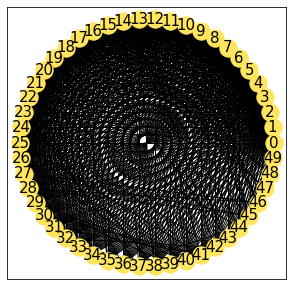

In [31]:
try:
    seq = prepare_random_vertices(50)
    matrix = create_graph_from_seq(seq)
    create_graph_visualization(np.matrix(matrix))
except Exception as e:
    print(e)

### Funkcja tworząca losowy graf eulerowski. Funkcja nic nie zwraca

In [32]:
def generate_euler_graph(numberOfVertices):
    
    """
        Function generates random Euler graph with given number of vertices.
        :param numberOfVertices: an integer which specify a length of an array
        :return : None.
    """
    
    if numberOfVertices < 3:
        print(" ")
        return
    vertices = prepare_random_vertices(numberOfVertices)
    #graph = from_list_to_matrix_neighbour({1: [2,6], 2: [1,3,5,6], 3: [2,4,5,6], 4: [3,5], 5: [2,3,4,6], 6: [1,2,3,5]})
    #graph = from_list_to_matrix_neighbour({1: [2,3,9,10], 2: [1,3,9,10], 3: [1,2,4,8,9,10], 4: [3,5,6,7,8,9], 5: [4,6,7,8], 6: [4,5,7,8], 7: [4,5,6,8], 8: [3,4,5,6,7,9], 9: [1,2,3,4,8,10], 10: [1,2,3,9]})
    #graph = from_list_to_matrix_neighbour({1: [2,3,4,5], 2: [1,5,6,7], 3: [1,4], 4: [1,3], 5: [1,2], 6: [2,7], 7: [2,6]})
    #graph = from_list_to_matrix_neighbour({1: [2,12], 2: [1,3], 3: [2,4], 4: [3,5,9,11], 5: [4,6], 6: [5,7], 7: [6,8], 8: [7,9], 9: [4,8,10,11], 10: [9,11], 11: [4,9,10,12], 12: [1, 11]})
    try:
        graph = create_graph_from_seq(vertices)
    except Exception as e:
        print(e)
    while getNumberOfComponents(from_matrix_neighbour_to_list(graph)) != 1:
        vertices = prepare_random_vertices(numberOfVertices)
        try:
            graph = create_graph_from_seq(vertices)
        except Exception as e:
            print(e)
    create_graph_visualization(np.matrix(graph))
    #print(from_matrix_neighbour_to_list(graph))
    cycle = []
    find_euler_cycle(cycle, 0, graph, 0)
    path = ""
    for i in range(len(cycle)):
        if i == 0:
            path = path + str(cycle[len(cycle)-1])
        else:
            path = path + " - " + str(cycle[len(cycle)-1-i])
    print(path)

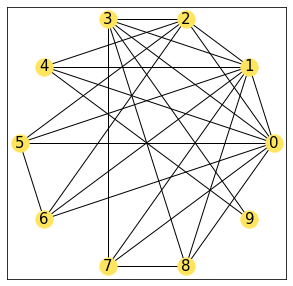

1 - 2 - 3 - 1 - 4 - 2 - 5 - 1 - 6 - 2 - 7 - 1 - 8 - 2 - 9 - 4 - 3 - 6 - 7 - 3 - 5 - 10 - 4 - 8 - 9 - 1


In [33]:
generate_euler_graph(10)

## Zad6

### Zmodyfikowany algorytm przechodzenia grafu w głąb. Pozwala znaleźć ścieżkę Hamiltona w grafie jeżeli taka istnieje. Jako parametry przyjmuje numer odwiedzanego wierzchołka, listę sąsiedztwa,  tablice z informacją o odwiedzonych wierzchołkach,  stos przechowujący numery odwiedzonych wierzchołków.

In [34]:
def modified_components_r(v, graph, comp, stack):
    
    """
        Function checks if there is a Hamilton cycle in the graph or not.
        :param v: number of vertex
        :param graph: a dictionary in which keys are numbers of graph vertex and values
                    are lists of other vertexes connected with them by edge
        :param comp: an array which contains an information about visited vertices
        :param stack: an array which contains an indexes of visited vertices
        :return : None.
    """
    
    for i in graph.get(v):
        if comp[i-1] == -1:
            comp[i-1] = 1
            stack.append(i)
            if len(stack) == len(graph):
                if not stack[0] in graph.get(i):
                    tmp = stack.pop()
                    comp[tmp-1] = -1
                else:
                    stack.append(stack[0])
            else:
                modified_components_r(i, graph, comp, stack)
                if len(stack) <= len(graph): # Ścieżka hamiltona w grafie ma o 1 wierzchołek więcej od wierzchołków grafu
                    tmp = stack.pop()
                    comp[tmp-1] = -1

### Funkcja wypisująca ścieżkę Hamiltona występującą w grafie. Jako argument przyjmuje graf w formie listy sąsiedztwa.

In [35]:
def find_hamilton_cycle(graph):
    
    """
        Function looks for a Hamilton cycle in the given graph. It prints out the Hamilton cycle based on the vertices from 
        the stack or prints the information that there is no Hamilton cycle in the graph.
        :param graph: a dictionary in which keys are numbers of graph vertex and values
                    are lists of other vertexes connected with them by edge
        :return : None.
    """
    if len(graph) < 20 and getNumberOfComponents(graph) == 1:
        comp = [-1 for i in range(len(graph))]
        stack = []
        for i in range(len(graph)):
            if comp[i] == -1:
                comp[i] = 1
                stack.append(i+1)
                modified_components_r(1, graph, comp, stack)
        if len(stack) == len(graph)+1:
            tmpStr = "["
            for i in range(len(stack)):
                if i < len(stack)-1:
                    tmpStr = tmpStr + str(stack[i]) + " - "
                else:
                    tmpStr = tmpStr + str(stack[i]) + "]"
            print(tmpStr)
        else:
            print("No hamilton cycle in this graph!")

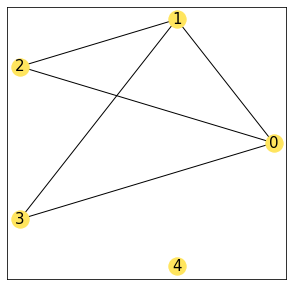

Couldn't randomize graph!


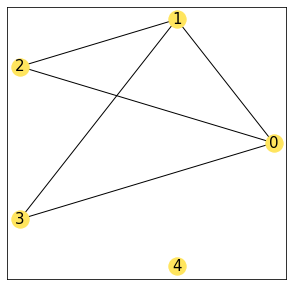

[1 - 2 - 3 - 7 - 4 - 6 - 8 - 5 - 1]


In [36]:
try:
    matrix = create_graph_from_seq([3, 2, 0, 2, 3])
    create_graph_visualization(np.matrix(matrix))
    #print(matrix)
    randomize(matrix, 10)
    create_graph_visualization(np.matrix(matrix))
    #print(matrix)
    #find_hamilton_cycle(from_matrix_neighbour_to_list(matrix))
    find_hamilton_cycle({1: [2, 4, 5], 2: [1, 3, 5, 6], 3: [2, 4, 7], 4: [1, 3, 6, 7], 5: [1, 2, 8], 6: [2, 4, 8], 7: [3, 4, 8], 8: [5, 6, 7]})
    #find_hamilton_cycle({1: [2, 4, 5, 6], 2: [1, 3, 5, 6], 3: [2, 4, 5], 4: [1, 3, 5], 5: [1, 2, 3, 4], 6: [1, 2]})
except Exception as e:
        print(e)